# Support Vector Machines (SVMs)

## Learning objectives
- understand how SVMs work
- implement an SVM from scratch
- understand how the kernel trick always makes space separable
- use the SkLearn library to implement a SVM

## Intro - Which decision boundary is better?

Support vector machines can be used for both classification and regression. For now, we will focus on the classification problem.

# show different decision boundaries with different margins on separable data and try to get people to describe that the larger margin is better

One way to choose which decision boundary is best would be to find the one which separates the different classes by the greatest margin.


## what is a support vector machine?

SVMs produce point estimates for either regression or classification problems. 
It does not output probabilities like logistic regression or predict the most likely value from a distribution like in linear regression.
The decision boundary that they produce is characterised by having the greatest possible boundary.

We will start by looking at how SVMs handle binary classification, for data that is linearly separable.

Like linear and logistic regression, we can start building a SVM using a linear function. This linear function will depend on both a vector of weights and a bias, so SVMs are parametric models.
In the classification case SVMs predict true if the model output is positive and false if negative.

The desicion boundary is given by:
# $f(x) = wx + b = 0$

That means that any point which evaluates to $f(x) = 0$ is directly on the decision boundary.

The classification is made by the function 

# $H(x) = sign(f(x)) = sign(wx + b)$

For any examples that the SVM will classify as positive, $f(x) \geq 0$.
For any examples that the SVM will classify as negative, $f(x) \leq 0$.

For binary classification using SVMs, the labels are not 1 or 0 like we have seen up to this point.
Instead, the labels are +1 or -1.

Some examples within each class will lie directly on the boundary of the margin, where $f(x) = +1$ for positive examples, and $f(x) = -1$ for negative examples.
These examples are known as the support vectors.
We will talk further about how the support vectors are found soon.

SVMs make a point estimate, rather than outputting a probability or a probability distribution.

## What is the objective function?
How can we quantify the size of the boundary as a function of our data and our model parameters? 

As mentioned, we want to maximise the margin, so that examples are separated by as much space as possible.
We could get an expression for the width of the margin by projecting a vector that crosses from one side of the margin to the other in a direction perpendicular to the decision boundary.
How can we get these 2 things?

### 1. A vector that crosses the margin
We know the equation of vectors (positive example support vectors) that are along the top of the margin is
# $f(x_+) = wx_+ + b = +1$
And that the equation of vectors (negative example support vectors) that are along the bottom of the margin is
# $f(x_-) = wx_- + b = -1$
The difference between any pair of points on each of these lines:
# $x_+ - x_-$

### 2. A unit vector perpendicular to the decision boundary
The vector of weights points perpendicular to the decision boundary.
To make this a unit vector we can divide by it's L2 norm.
# $\frac{\omega}{||\omega||}$

### Together now
# $(x_+ - x_-) \frac{w}{||w||} = (wx_+ - wx_-)  \frac{1}{||w||} = [(1 - b) - (-1 - b)]  \frac{1}{||w||} = \frac{2}{||w||}$

This is the width of the margin.
This is what we want to maximise.
Equivalently, we minimise
# $J = ||w||$ subject to 


### What if my data is not linearly separable?

If the data is not linearly separable, then the margin on either side of the boundary may be negative.

This is where SVMs really come into their own.
Support vector machines are capable of finding decision boundaries that are capable of splitting linearly inseparable data (where no straight line can split the members of a class from those not in it).
They do this by applying a function, called a kernel, to each example that projects it into a (usually higher dimensional) space where it is linearly separable.

## The Kernel Trick

Many machine learning algorithms can be written exclusively as dot products between examples.
By comparing the similarity between examples along different features.

Before taking this inner product between examples, we can transform each example in feature space.
This is reasonable because it's like you measured different features rather than the ones you have by default. E.g. you record floor area of a house rather than just width and length.

Transforming the examples using the kernel allows 
The model output is linear with respect to the kernel output, but can be very non-linear with respect to the raw input.

In [1]:

class LinearKernel:
    def __init__(self, X):
        self.X = X

    def linear_kernel(x):
        k = np.dot(X, x) # template match against all other examples
        return k


class SVM:
    def __init__(self, n_features=2, n_classes=10):
        self.w = np.random.rand(n_features, n_classes)
        self.b = np.random.rand(n_classes)

    def predict(self, x):
        h = np.matmul(x, self.w) + self.b
        return np.sign(h)

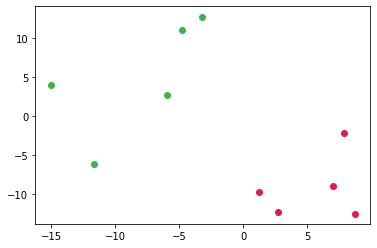

array([[ 1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1.,  1.],
       [-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [69]:
import pandas as pd

import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
from get_colors import colors

def get_data(m=100, n_features=2, n_clusters=4):
    X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=5.0)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    return X, Y

m = 10
n_features = 2
n_classes = 2
X, Y = get_data(m, n_features, n_classes)

def show_data(X, Y, predictions=None):
    for i in range(min(Y), max(Y)+1):
        # print(i)
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
    plt.show()

show_data(X, Y)
svm = SVM(n_features, n_classes)
svm.predict(X)

/home/ice/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[0 1 0 1 1 1 0 0 1 0]
1


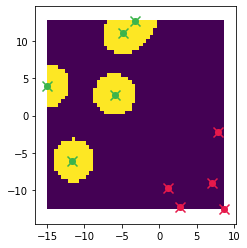

In [70]:
import sklearn.svm
from get_colors import colors

svm = sklearn.svm.SVC(C=1)#0000000000000000000000000000000000000000000000000000000000000)

svm.fit(X, Y)

predictions = svm.predict(X).astype(int)
print(predictions)
print(np.ptp(predictions))

def visualise_predictions(H, xmin, xmax, ymin, ymax, n=50):

    meshgrid = np.zeros((n, n))
    for x1_idx, x1 in enumerate(np.linspace(xmin, xmax, n)): # for each column
        for x2_idx, x2 in enumerate(np.linspace(ymin, ymax, n)): # for each row
            h = H(np.array([[x1, x2]])).astype(int)[0]
            # plt.scatter(x1, x2, c=colors[h])
            meshgrid[n-1-x2_idx, x1_idx] = h # axis 0 is the vertical direction starting from the top and increasing downward
    # meshgrid[n-1, 0] = 1000
    plt.imshow(meshgrid, extent=(xmin, xmax, ymin, ymax), cmap='viridis')
visualise_predictions(svm.predict, min(X[:, 0]), max(X[:, 0]), min(X[:, 1]), max(X[:, 1]))
show_data(X, Y, predictions)

plt.show()
